# Katrina Rivera, 004886996

# 441B Homework 9

# 0.) Import and Clean data

In [2]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
names = df[['country']].copy()

X = df.drop("country", axis = 1)

In [9]:
scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [11]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

# 2.) Pick two features to visualize across

In [12]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

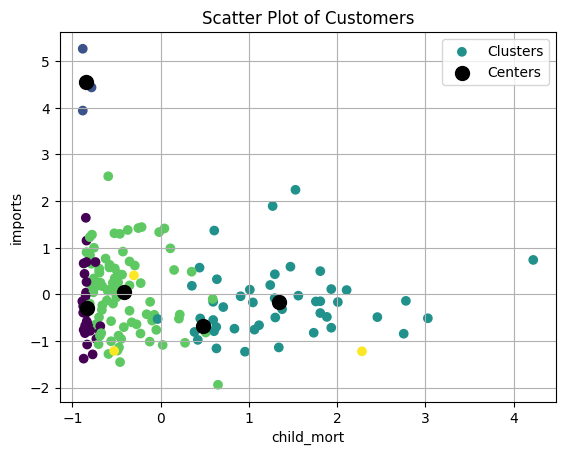

In [14]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 3


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [27]:
WCSSs = []
Ks = range(1,15)

for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, random_state = 42).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

C:\Users\Katrina\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

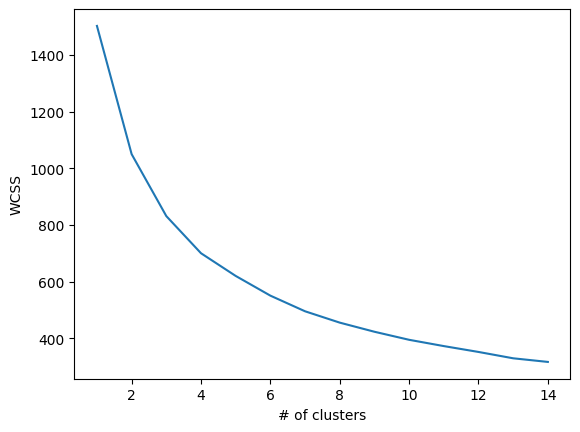

In [28]:
plt.plot(Ks, WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()


It is difficult to choose the number of clusters because there is no elbow in the graph. If we want to choose the number of clusters that adapts for WCSS and readability, I will choose 6 clusters because the relative decrease in WCSS is slowly declining after 6 clusters.


In [38]:
kmeans_elbow = KMeans(n_clusters = 6, n_init = 30).fit(X_scaled)
kmeans.labels_

array([11, 12, 13,  9,  3, 13,  0,  6,  1, 13, 12,  3,  0, 12,  8,  1,  8,
       11,  8,  0, 12,  8, 12,  5, 12, 11, 10,  8, 11,  6,  8, 11, 11, 12,
        0, 12,  2, 11,  9, 12, 11, 12,  3,  3,  1,  0, 12,  0, 12,  9,  2,
        3,  8,  6,  6,  2,  2, 12,  6,  2,  6,  0,  0, 11, 11,  8, 11,  3,
        6,  0, 13, 13,  2,  1,  6,  6,  0,  6,  8, 13,  2, 10,  5,  8,  2,
        3, 12, 10, 10,  3,  3,  4, 12,  2, 11,  3,  3, 11,  4,  9,  3, 10,
       12, 13, 12,  0, 11,  0,  8,  0,  1,  6, 11,  7,  1,  5,  2,  3,  8,
        0,  0, 12,  6,  5, 12, 13, 10,  0,  5,  2, 12,  3, 10,  4,  3,  3,
        8,  0,  3,  6, 13,  0,  2, 12,  6,  1,  0,  2,  3,  2, 11,  0, 12,
       12,  8, 11, 12,  5,  6,  6, 12, 13,  8, 13,  8,  2, 11])

# 6.) Do the same for a silhoutte plot

In [30]:
from sklearn.metrics import silhouette_score

In [33]:

SSs = []
Ks = range(2,15)

for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, random_state = 42).fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    SSs.append(sil)

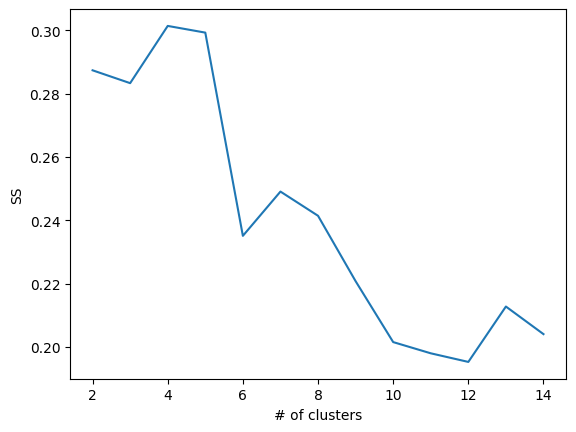

In [34]:
plt.plot(Ks, SSs)
plt.xlabel("# of clusters")
plt.ylabel("SS")
plt.show()

The max SS score would be 4 clusters. Therefore, 4 would be the most optimal number of clusters.

In [36]:
kmeans_sill = KMeans(n_clusters = 4, n_init = 30).fit(X_scaled)

In [37]:
kmeans.labels_

array([11, 12, 13,  9,  3, 13,  0,  6,  1, 13, 12,  3,  0, 12,  8,  1,  8,
       11,  8,  0, 12,  8, 12,  5, 12, 11, 10,  8, 11,  6,  8, 11, 11, 12,
        0, 12,  2, 11,  9, 12, 11, 12,  3,  3,  1,  0, 12,  0, 12,  9,  2,
        3,  8,  6,  6,  2,  2, 12,  6,  2,  6,  0,  0, 11, 11,  8, 11,  3,
        6,  0, 13, 13,  2,  1,  6,  6,  0,  6,  8, 13,  2, 10,  5,  8,  2,
        3, 12, 10, 10,  3,  3,  4, 12,  2, 11,  3,  3, 11,  4,  9,  3, 10,
       12, 13, 12,  0, 11,  0,  8,  0,  1,  6, 11,  7,  1,  5,  2,  3,  8,
        0,  0, 12,  6,  5, 12, 13, 10,  0,  5,  2, 12,  3, 10,  4,  3,  3,
        8,  0,  3,  6, 13,  0,  2, 12,  6,  1,  0,  2,  3,  2, 11,  0, 12,
       12,  8, 11, 12,  5,  6,  6, 12, 13,  8, 13,  8,  2, 11])

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [39]:
preds = pd.DataFrame(kmeans_sill.labels_)

In [41]:
output = pd.concat([preds, df], axis = 1)

In [42]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,3,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,3,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,3,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,3,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [46]:
print("Cluster 1:")
list(output.loc[output[0] == 0, "country"])

Cluster 1:


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [47]:
print("Cluster 2:")
list(output.loc[output[0] == 1, "country"])

Cluster 2:


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [48]:
print("Cluster 3:")
list(output.loc[output[0] == 2, "country"])

Cluster 3:


['Luxembourg', 'Malta', 'Singapore']

In [49]:
print("Cluster 4:")
list(output.loc[output[0] == 3, "country"])

Cluster 4:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent an

In [50]:
#### Write an observation

These groups appear to be based on economic performance, where cluster 1 are large, highly developed coutnries with advanced economics, cluster 2 are deveping coutnries, cluter 3 are small, highly developed coutnreis, and cluster four are countires with mixed development. 

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [52]:
output.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448


In [54]:
output.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,2.159140,21.736255,3.266299,17.455134,19785.308900,4.266366,1.440231,0.369293,15040.114942
1,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925
2,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084
3,13.821462,19.523129,2.158742,20.083366,8870.376775,7.808165,3.947474,0.696392,5453.932294


# 9.) Write an observation about the descriptive statistics.

One observation about the descriptive statistics provided for each cluster is the difference in variation across the clusters. For example, Cluster 1 and 3 have low mean child mortality rates, while Cluster 2 and 4 have high mean child mortality rates. Overall, Clusters 2 and 4 have higher mean exports, income, life expectancy, and GDP, indicating that they are more developed. There is also more variation in Clusters 2 and 4 across socio-economic indicators such as child mortality rates, income levels, and GDP per capita. Since there is more variation in socio-economic factors that are about the health of a country, this tells us that there is less stability in Clusters 2 and 4.









